# **1. Install ydata-profiling**

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ad900791d2063cb0b9caa25e0ffe46699e5400671094cff62f1cd3c33838c93c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# **2.   Run Data Profiling for Total Bookings and Canceled Bookings**



In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

# Handle Missing Values in 'country' CORRECTLY
df['country'] = df['country'].astype(str).replace(r'^\s*$', pd.NA, regex=True)

# Calculate total stay
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate cancellation ratio (handling potential division by zero)
df['cancellation_ratio'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'] + 0.00001)
df.loc[(df['previous_cancellations'] == 0) & (df['previous_bookings_not_canceled'] == 0), 'cancellation_ratio'] = 0

# Create a DataFrame for canceled bookings only
canceled_df = df[df['is_canceled'] == 1]

# Generate profile reports
profile_all = ProfileReport(df, title="Profiling Report - All Bookings", explorative=True)
profile_canceled = ProfileReport(canceled_df, title="Profiling Report - Canceled Bookings", explorative=True)

# Save the reports to separate HTML files
profile_all.to_file("all_bookings_report.html")
profile_canceled.to_file("canceled_bookings_report.html")

# Combine the reports into a single HTML file using iframes
with open("combined_profile_report.html", "w") as f:
    f.write("<html><head><title>Combined Profiling Report</title></head><body>")
    f.write("<h1>Profiling Report - All Bookings</h1>")
    f.write(f'<iframe src="all_bookings_report.html" width="100%" height="800"></iframe><br><br><br>')  # Add spacing
    f.write("<hr>")  # Add a separator
    f.write("<h1>Profiling Report - Canceled Bookings</h1>")
    f.write(f'<iframe src="canceled_bookings_report.html" width="100%" height="800"></iframe>')
    f.write("</body></html>")


print("Combined profiling report saved to combined_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Combined profiling report saved to combined_profile_report.html


# **3. Confirmed Bookings vs Canceled Bookings Pie Chart**

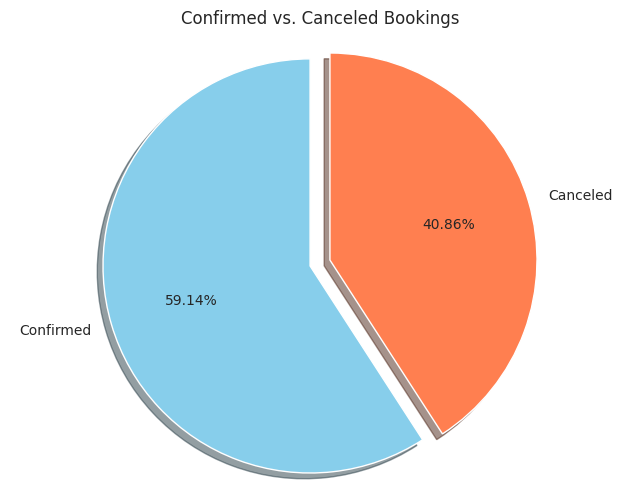

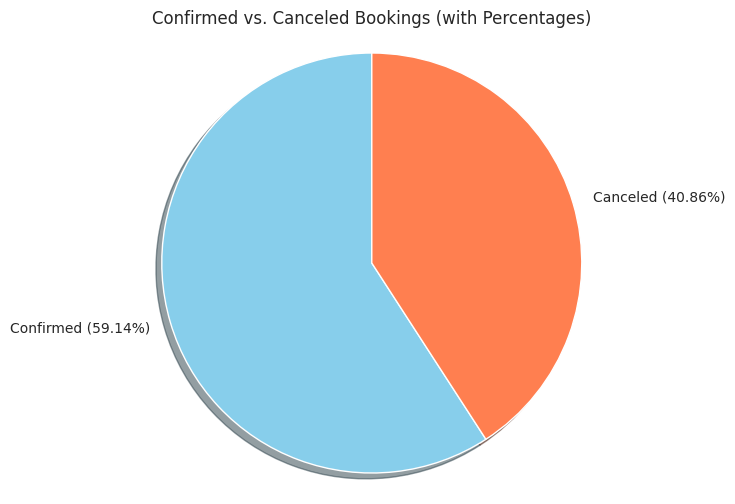

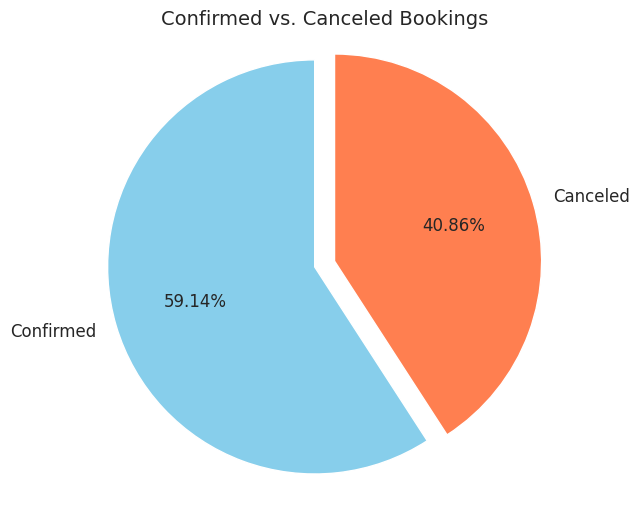

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

# Count the number of canceled and not canceled bookings
cancellation_counts = df['is_canceled'].value_counts()

# Extract the counts for plotting
canceled = cancellation_counts.get(1, 0)  # Get count for '1' (canceled), default 0 if not present
not_canceled = cancellation_counts.get(0, 0) # Get count for '0' (not canceled), default 0 if not present

# Create the pie chart
labels = ['Confirmed', 'Canceled']
sizes = [not_canceled, canceled]
colors = ['skyblue', 'coral']  # Choose your colors
explode = (0, 0.1)  # Explode the second slice (Canceled) for emphasis

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Confirmed vs. Canceled Bookings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# --- Improved Version with Percentage Calculation ---
total_bookings = len(df)
canceled_percentage = (canceled / total_bookings) * 100
not_canceled_percentage = (not_canceled / total_bookings) * 100

labels_percent = [f'Confirmed ({not_canceled_percentage:.2f}%)', f'Canceled ({canceled_percentage:.2f}%)']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels_percent, colors=colors, autopct='', shadow=True, startangle=90) #autopct is removed because we already have the percentages in the labels
plt.title('Confirmed vs. Canceled Bookings (with Percentages)')
plt.axis('equal')
plt.show()


# --- Version with seaborn for better aesthetics---
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_palette(colors)
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode, textprops={'fontsize': 12})
plt.title('Confirmed vs. Canceled Bookings', fontsize=14)
plt.axis('equal')
plt.show()

# **4. ADR Scatter Plot for Total Hotel Bookings & Canceled Bookings**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px  # For interactive plots
import plotly.offline as py
py.init_notebook_mode(connected=True)

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

# Convert is_canceled to numeric (0 and 1) if it's not already
df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Create separate DataFrames
all_bookings = df
canceled_bookings = df[df['is_canceled'] == 1]

# --- Create interactive scatter plots with Plotly ---

# All Bookings
fig_all = px.scatter(all_bookings, x='adr', y=all_bookings.index, title='ADR for All Bookings (Interactive Scatter Plot)',
                     labels={'adr': 'Average Daily Rate (ADR)', 'y': 'Booking Index'},
                     width=800, height=600)
fig_all.update_layout(xaxis_range=[0, 300]) #limit x axis
fig_all.write_html("all_bookings_scatter.html")

# Canceled Bookings
fig_canceled = px.scatter(canceled_bookings, x='adr', y=canceled_bookings.index, title='ADR for Canceled Bookings (Interactive Scatter Plot)',
                          labels={'adr': 'Average Daily Rate (ADR)', 'y': 'Booking Index'},
                          color_discrete_sequence=['red'], width=800, height=600)
fig_canceled.update_layout(xaxis_range=[0, 300]) #limit x axis
fig_canceled.write_html("canceled_bookings_scatter.html")

# Combine the plots into a single HTML file using iframes
with open("combined_scatter_plots.html", "w") as f:
    f.write("<html><head><title>Combined Scatter Plots</title></head><body>")
    f.write("<h1>ADR for All Bookings</h1>")
    f.write(f'<iframe src="all_bookings_scatter.html" width="100%" height="700"></iframe><br><br><br>')
    f.write("<hr>")
    f.write("<h1>ADR for Canceled Bookings</h1>")
    f.write(f'<iframe src="canceled_bookings_scatter.html" width="100%" height="700"></iframe>')
    f.write("</body></html>")

print("Scatter plots saved to separate and combined HTML files.")

Scatter plots saved to separate and combined HTML files.


# **5. Create Line Chart for Total Bookings & Canceled Bookings by Month**

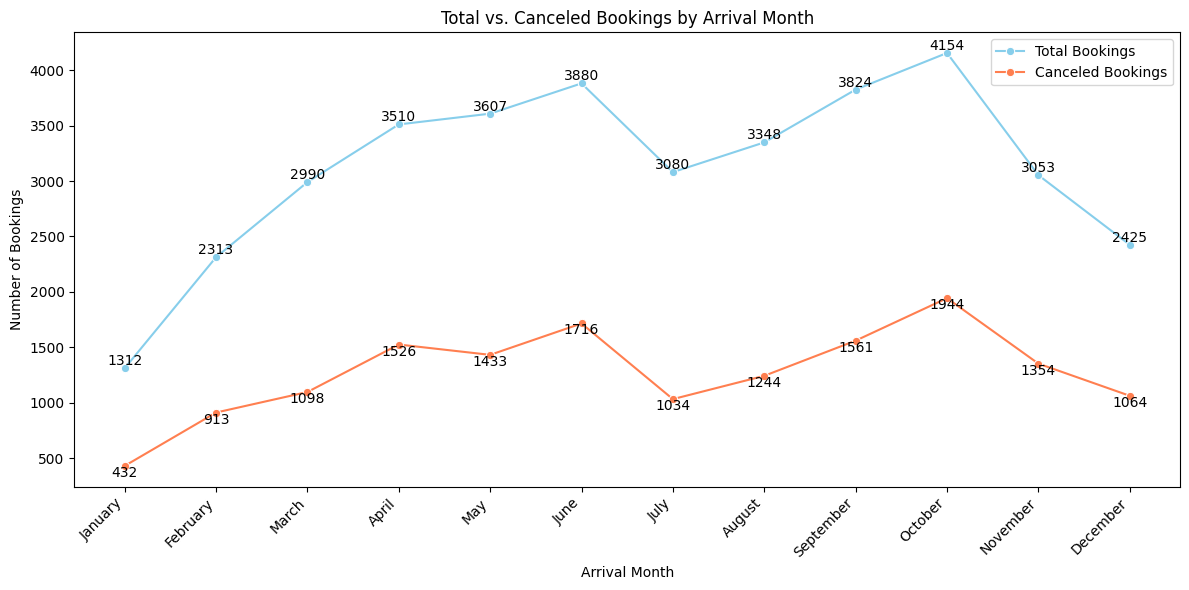

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

# Convert is_canceled to numeric (0 and 1) if it's not already
df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Group by arrival month and count total and canceled bookings
monthly_bookings = df.groupby('arrival_date_month').size().reset_index(name='total_bookings')
monthly_cancellations = df[df['is_canceled'] == 1].groupby('arrival_date_month').size().reset_index(name='canceled_bookings')

# Merge the two dataframes
monthly_data = pd.merge(monthly_bookings, monthly_cancellations, on='arrival_date_month', how='left').fillna(0) #fillna to handle months with no cancellations

# Order the months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['arrival_date_month'] = pd.Categorical(monthly_data['arrival_date_month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('arrival_date_month')

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='total_bookings', data=monthly_data, marker='o', label='Total Bookings')
sns.lineplot(x='arrival_date_month', y='canceled_bookings', data=monthly_data, marker='o', label='Canceled Bookings')

# Add numbers to the lines
for index, row in monthly_data.iterrows():
    plt.text(row['arrival_date_month'], row['total_bookings'], int(row['total_bookings']), ha='center', va='bottom')
    plt.text(row['arrival_date_month'], row['canceled_bookings'], int(row['canceled_bookings']), ha='center', va='top')

plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.title('Total vs. Canceled Bookings by Arrival Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#Alternative with Plotly for interactivity:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_data['arrival_date_month'], y=monthly_data['total_bookings'], mode='lines+markers+text', name='Total Bookings',
                         text=monthly_data['total_bookings'], textposition="bottom center"))
fig.add_trace(go.Scatter(x=monthly_data['arrival_date_month'], y=monthly_data['canceled_bookings'], mode='lines+markers+text', name='Canceled Bookings',
                         text=monthly_data['canceled_bookings'], textposition="top center"))

fig.update_layout(title='Total vs. Canceled Bookings by Arrival Month',
                  xaxis_title='Arrival Month',
                  yaxis_title='Number of Bookings',
                  xaxis={'categoryorder':'array', 'categoryarray':month_order}) #Correct ordering with plotly
fig.show()

# **6. Create Bar Chart for Total Bookings & Canceled Bookings by Distribution Channel**



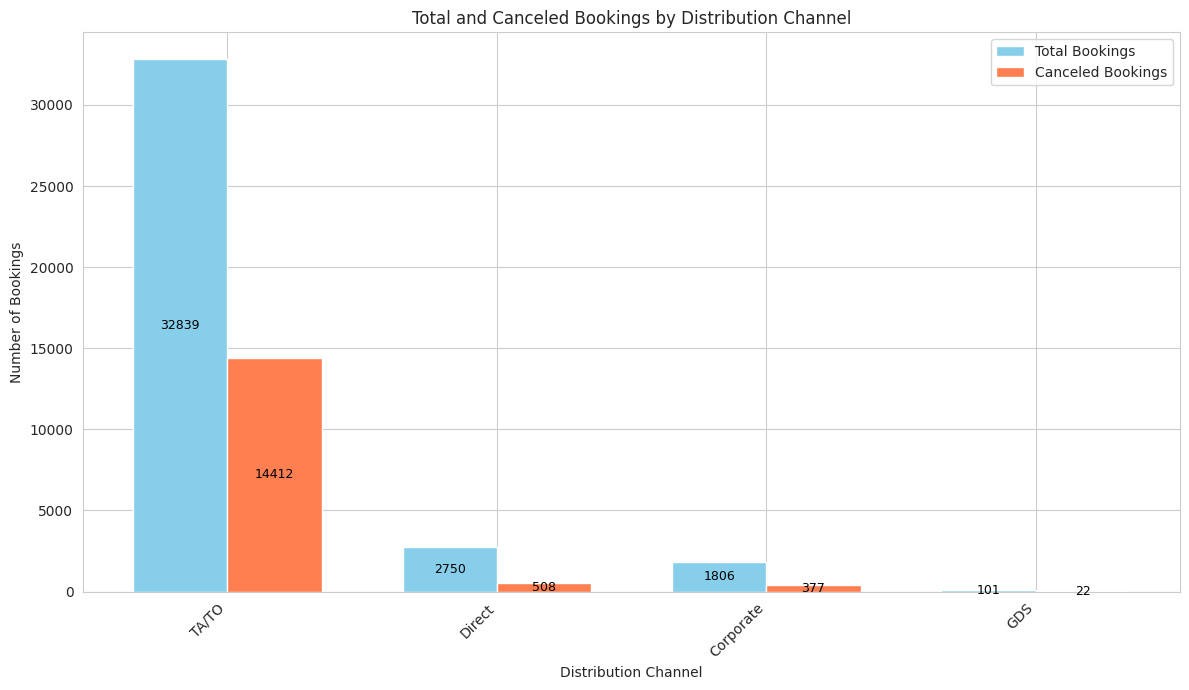

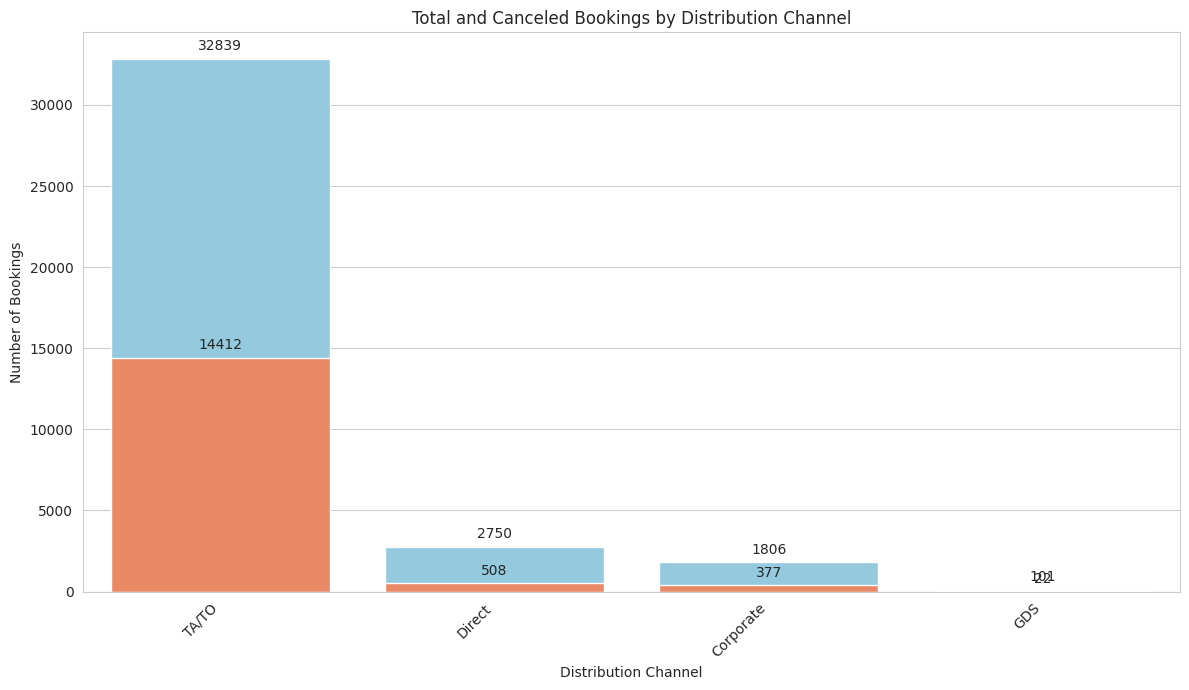

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Group by distribution channel and get counts
channel_bookings = df.groupby('distribution_channel').size().reset_index(name='Total Bookings')
channel_cancellations = df[df['is_canceled'] == 1].groupby('distribution_channel').size().reset_index(name='Canceled Bookings')

# Merge the data
channel_data = pd.merge(channel_bookings, channel_cancellations, on='distribution_channel', how='left').fillna(0)

# Sort by total bookings in descending order
channel_data = channel_data.sort_values('Total Bookings', ascending=False)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(channel_data))

# Matplotlib version
plt.figure(figsize=(12, 7))
plt.bar(index, channel_data['Total Bookings'], bar_width, label='Total Bookings', color='skyblue')
plt.bar(index + bar_width, channel_data['Canceled Bookings'], bar_width, label='Canceled Bookings', color='coral')

# Add numbers inside the bars
for i, (total, canceled) in enumerate(zip(channel_data['Total Bookings'], channel_data['Canceled Bookings'])):
    plt.text(i, total / 2, str(int(total)), ha='center', va='center', color='black', fontsize=9)
    plt.text(i + bar_width, canceled / 2, str(int(canceled)), ha='center', va='center', color='black', fontsize=9)

plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Distribution Channel')
plt.xticks(index + bar_width/2, channel_data['distribution_channel'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Seaborn version
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.set_palette(['skyblue', 'coral'])

ax = sns.barplot(x='distribution_channel', y='Total Bookings', data=channel_data)
ax = sns.barplot(x='distribution_channel', y='Canceled Bookings', data=channel_data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Distribution Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plotly version
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=channel_data['distribution_channel'], y=channel_data['Total Bookings'], name='Total Bookings', text=channel_data['Total Bookings'], textposition='inside', marker_color='skyblue'))
fig.add_trace(go.Bar(x=channel_data['distribution_channel'], y=channel_data['Canceled Bookings'], name='Canceled Bookings', text=channel_data['Canceled Bookings'], textposition='inside', marker_color='coral'))

fig.update_layout(title='Total and Canceled Bookings by Distribution Channel',
                  xaxis_title='Distribution Channel', yaxis_title='Number of Bookings', barmode='group') #group for side by side bars
fig.show()

# **7. Create Bar Chart for TA/TO Total Bookings & Canceled Bookings by Market Segmentation**



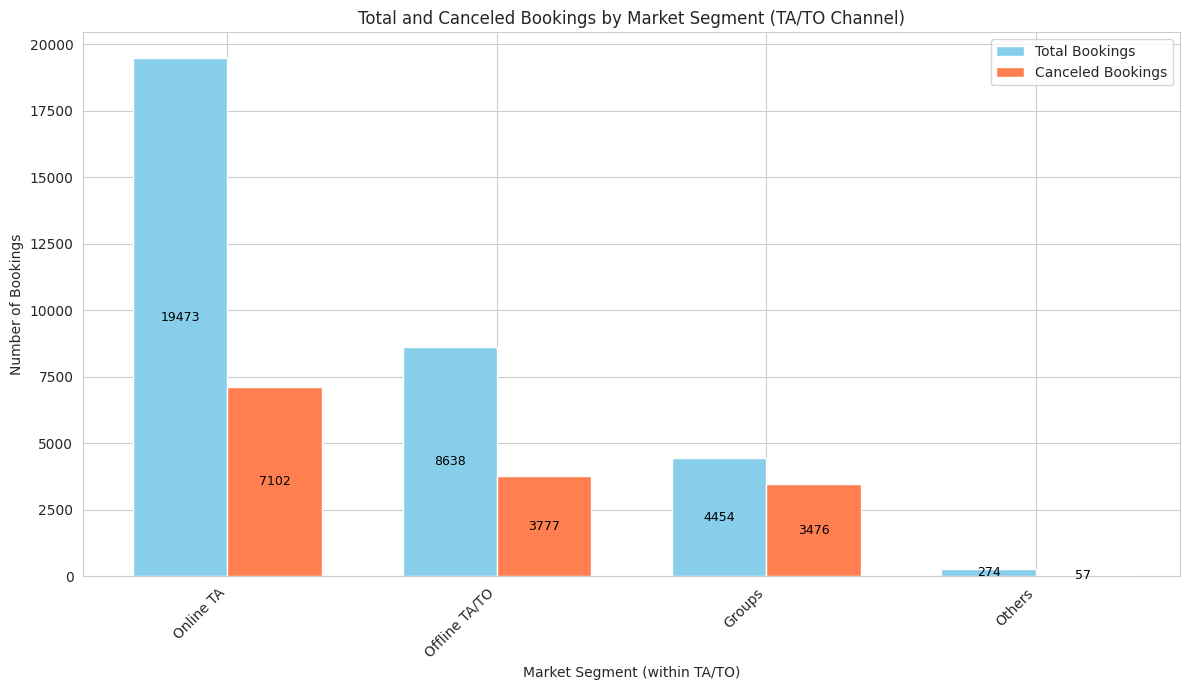

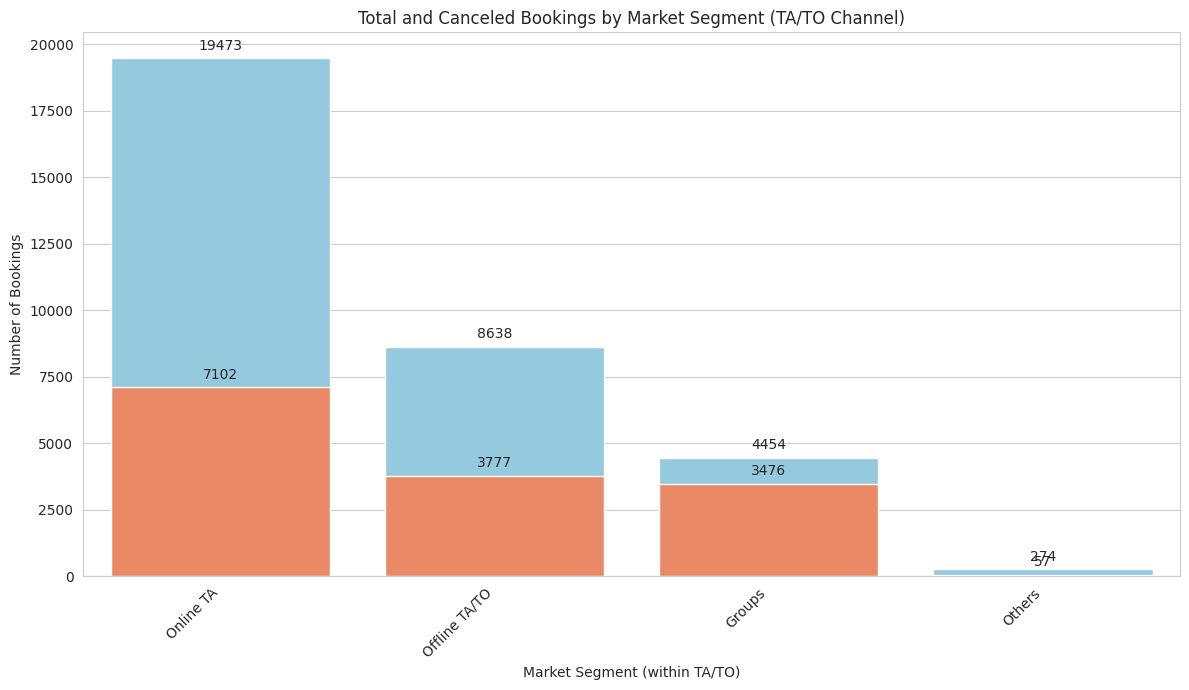

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Filter for TA/TO bookings
ta_to_bookings = df[df['distribution_channel'] == 'TA/TO']

# Group by market segment and get counts
market_segment_bookings = ta_to_bookings.groupby('market_segment').size().reset_index(name='Total Bookings')
market_segment_cancellations = ta_to_bookings[ta_to_bookings['is_canceled'] == 1].groupby('market_segment').size().reset_index(name='Canceled Bookings')

# Merge the data
market_segment_data = pd.merge(market_segment_bookings, market_segment_cancellations, on='market_segment', how='left').fillna(0)

# Cluster smaller segments into "Others"
other_segments = ['Corporate', 'Direct', 'Aviation', 'Complementary']
market_segment_data.loc[market_segment_data['market_segment'].isin(other_segments), 'market_segment'] = 'Others'

# Group by the new market segments (including "Others") and sum the values
market_segment_data = market_segment_data.groupby('market_segment').sum().reset_index()

# Sort by total bookings in descending order
market_segment_data = market_segment_data.sort_values('Total Bookings', ascending=False)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(market_segment_data))

# Matplotlib version
plt.figure(figsize=(12, 7))
plt.bar(index, market_segment_data['Total Bookings'], bar_width, label='Total Bookings', color='skyblue')
plt.bar(index + bar_width, market_segment_data['Canceled Bookings'], bar_width, label='Canceled Bookings', color='coral')

# Add numbers inside the bars
for i, (total, canceled) in enumerate(zip(market_segment_data['Total Bookings'], market_segment_data['Canceled Bookings'])):
    plt.text(i, total / 2, str(int(total)), ha='center', va='center', color='black', fontsize=9)
    plt.text(i + bar_width, canceled / 2, str(int(canceled)), ha='center', va='center', color='black', fontsize=9)

plt.xlabel('Market Segment (within TA/TO)')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Market Segment (TA/TO Channel)')
plt.xticks(index + bar_width/2, market_segment_data['market_segment'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Seaborn version
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.set_palette(['skyblue', 'coral'])

ax = sns.barplot(x='market_segment', y='Total Bookings', data=market_segment_data)
ax = sns.barplot(x='market_segment', y='Canceled Bookings', data=market_segment_data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Market Segment (within TA/TO)')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Market Segment (TA/TO Channel)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plotly version
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=market_segment_data['market_segment'], y=market_segment_data['Total Bookings'], name='Total Bookings', text=market_segment_data['Total Bookings'], textposition='inside', marker_color='skyblue'))
fig.add_trace(go.Bar(x=market_segment_data['market_segment'], y=market_segment_data['Canceled Bookings'], name='Canceled Bookings', text=market_segment_data['Canceled Bookings'], textposition='inside', marker_color='coral'))

fig.update_layout(title='Total and Canceled Bookings by Market Segment (TA/TO Channel)',
                  xaxis_title='Market Segment (within TA/TO)', yaxis_title='Number of Bookings', barmode='group')
fig.show()

# **8. Create Bar Chart for TA/TO Total Bookings & Canceled Bookings by Customer Type**

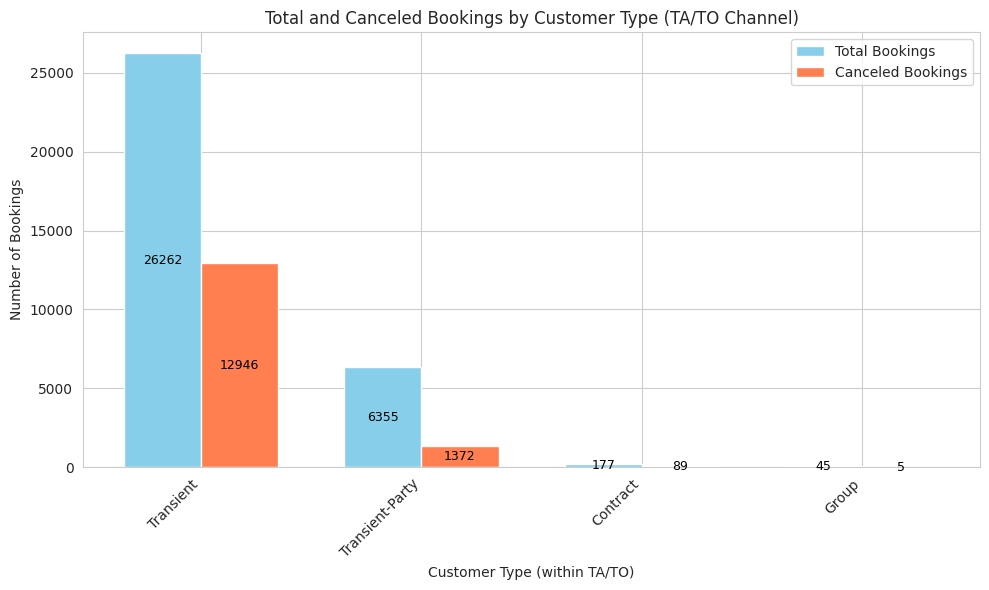

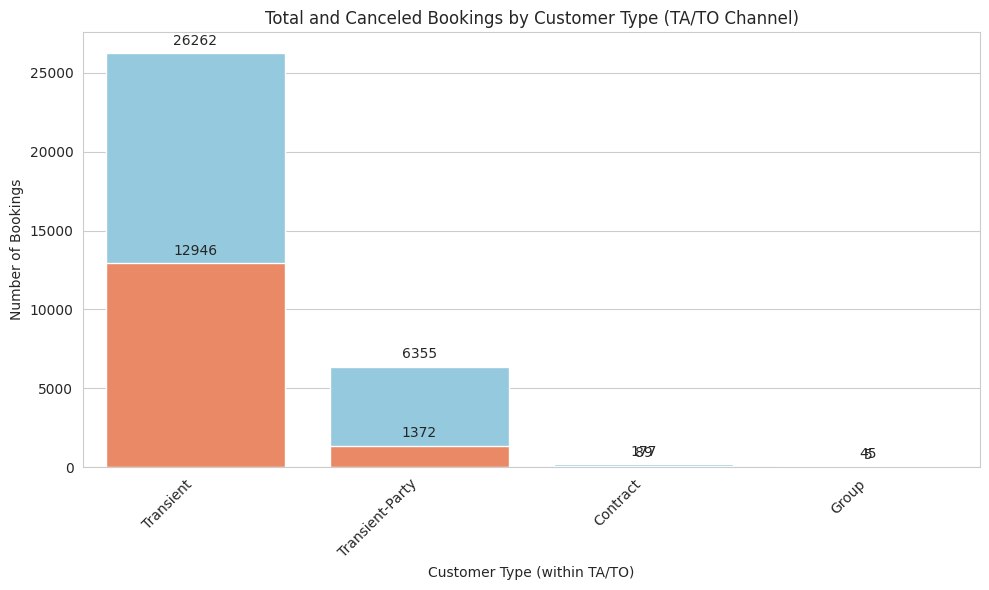

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Filter for TA/TO bookings
ta_to_bookings = df[df['distribution_channel'] == 'TA/TO']

# Group by customer type and get counts
customer_bookings = ta_to_bookings.groupby('customer_type').size().reset_index(name='Total Bookings')
customer_cancellations = ta_to_bookings[ta_to_bookings['is_canceled'] == 1].groupby('customer_type').size().reset_index(name='Canceled Bookings')

# Merge the data
customer_data = pd.merge(customer_bookings, customer_cancellations, on='customer_type', how='left').fillna(0)

# Sort by total bookings in descending order
customer_data = customer_data.sort_values('Total Bookings', ascending=False)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(customer_data))

# Matplotlib version
plt.figure(figsize=(10, 6))
plt.bar(index, customer_data['Total Bookings'], bar_width, label='Total Bookings', color='skyblue')
plt.bar(index + bar_width, customer_data['Canceled Bookings'], bar_width, label='Canceled Bookings', color='coral')

# Add numbers inside the bars
for i, (total, canceled) in enumerate(zip(customer_data['Total Bookings'], customer_data['Canceled Bookings'])):
    plt.text(i, total / 2, str(int(total)), ha='center', va='center', color='black', fontsize=9)
    plt.text(i + bar_width, canceled / 2, str(int(canceled)), ha='center', va='center', color='black', fontsize=9)

plt.xlabel('Customer Type (within TA/TO)')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Customer Type (TA/TO Channel)')
plt.xticks(index + bar_width/2, customer_data['customer_type'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Seaborn version
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette(['skyblue', 'coral'])

ax = sns.barplot(x='customer_type', y='Total Bookings', data=customer_data)
ax = sns.barplot(x='customer_type', y='Canceled Bookings', data=customer_data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Customer Type (within TA/TO)')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Customer Type (TA/TO Channel)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plotly version
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=customer_data['customer_type'], y=customer_data['Total Bookings'], name='Total Bookings', text=customer_data['Total Bookings'], textposition='inside', marker_color='skyblue'))
fig.add_trace(go.Bar(x=customer_data['customer_type'], y=customer_data['Canceled Bookings'], name='Canceled Bookings', text=customer_data['Canceled Bookings'], textposition='inside', marker_color='coral'))

fig.update_layout(title='Total and Canceled Bookings by Customer Type (TA/TO Channel)',
                  xaxis_title='Customer Type (within TA/TO)', yaxis_title='Number of Bookings', barmode='group')
fig.show()

# **9. Create Bar Chart for for TA/TO Total Bookings & Canceled Bookings by Deposit Type**

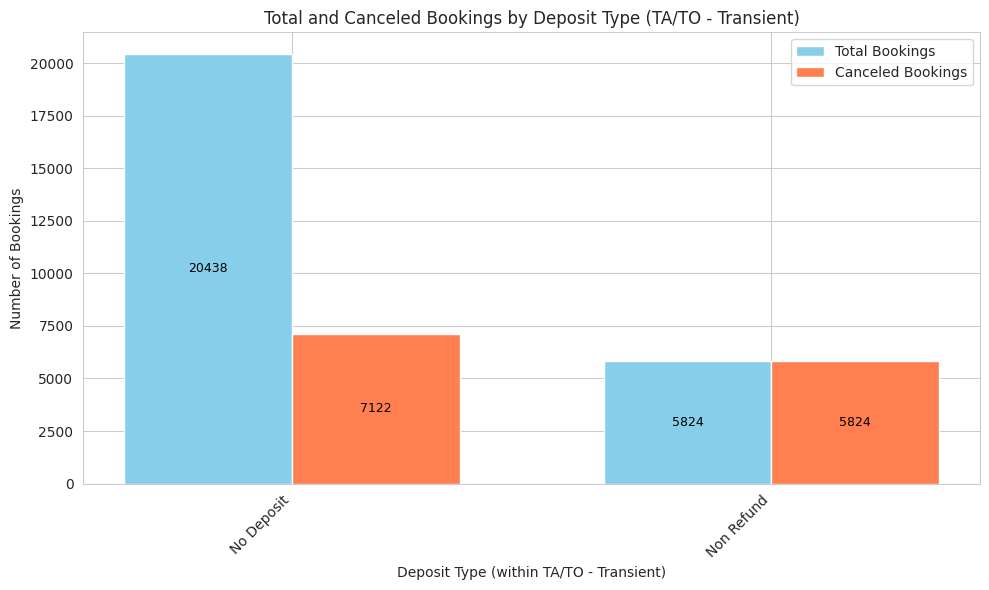

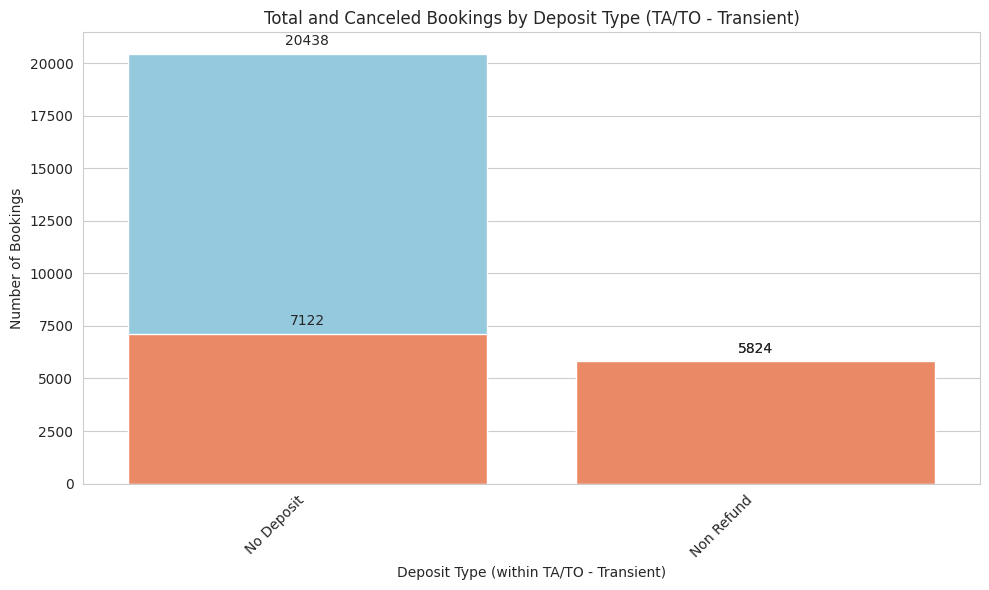

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Filter for TA/TO bookings and Transient Customer Type
ta_to_transient_bookings = df[(df['distribution_channel'] == 'TA/TO') & (df['customer_type'] == 'Transient')]

# Group by deposit type and get counts
deposit_bookings = ta_to_transient_bookings.groupby('deposit_type').size().reset_index(name='Total Bookings')
deposit_cancellations = ta_to_transient_bookings[ta_to_transient_bookings['is_canceled'] == 1].groupby('deposit_type').size().reset_index(name='Canceled Bookings')

# Merge the data
deposit_data = pd.merge(deposit_bookings, deposit_cancellations, on='deposit_type', how='left').fillna(0)

# Sort by total bookings in descending order
deposit_data = deposit_data.sort_values('Total Bookings', ascending=False)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(deposit_data))

# Matplotlib version
plt.figure(figsize=(10, 6))
plt.bar(index, deposit_data['Total Bookings'], bar_width, label='Total Bookings', color='skyblue')
plt.bar(index + bar_width, deposit_data['Canceled Bookings'], bar_width, label='Canceled Bookings', color='coral')

# Add numbers inside the bars
for i, (total, canceled) in enumerate(zip(deposit_data['Total Bookings'], deposit_data['Canceled Bookings'])):
    plt.text(i, total / 2, str(int(total)), ha='center', va='center', color='black', fontsize=9)
    plt.text(i + bar_width, canceled / 2, str(int(canceled)), ha='center', va='center', color='black', fontsize=9)

plt.xlabel('Deposit Type (within TA/TO - Transient)')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Deposit Type (TA/TO - Transient)')
plt.xticks(index + bar_width/2, deposit_data['deposit_type'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Seaborn version
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette(['skyblue', 'coral'])

ax = sns.barplot(x='deposit_type', y='Total Bookings', data=deposit_data)
ax = sns.barplot(x='deposit_type', y='Canceled Bookings', data=deposit_data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Deposit Type (within TA/TO - Transient)')
plt.ylabel('Number of Bookings')
plt.title('Total and Canceled Bookings by Deposit Type (TA/TO - Transient)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plotly version
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=deposit_data['deposit_type'], y=deposit_data['Total Bookings'], name='Total Bookings', text=deposit_data['Total Bookings'], textposition='inside', marker_color='skyblue'))
fig.add_trace(go.Bar(x=deposit_data['deposit_type'], y=deposit_data['Canceled Bookings'], name='Canceled Bookings', text=deposit_data['Canceled Bookings'], textposition='inside', marker_color='coral'))

fig.update_layout(title='Total and Canceled Bookings by Deposit Type (TA/TO - Transient)',
                  xaxis_title='Deposit Type (within TA/TO - Transient)', yaxis_title='Number of Bookings', barmode='group')
fig.show()

# **10. Lead Time Histogram for TA/TO Selecting market Segmentation (Online TO, Offline TA/TO, Groups) and Customer Type (Transient)**

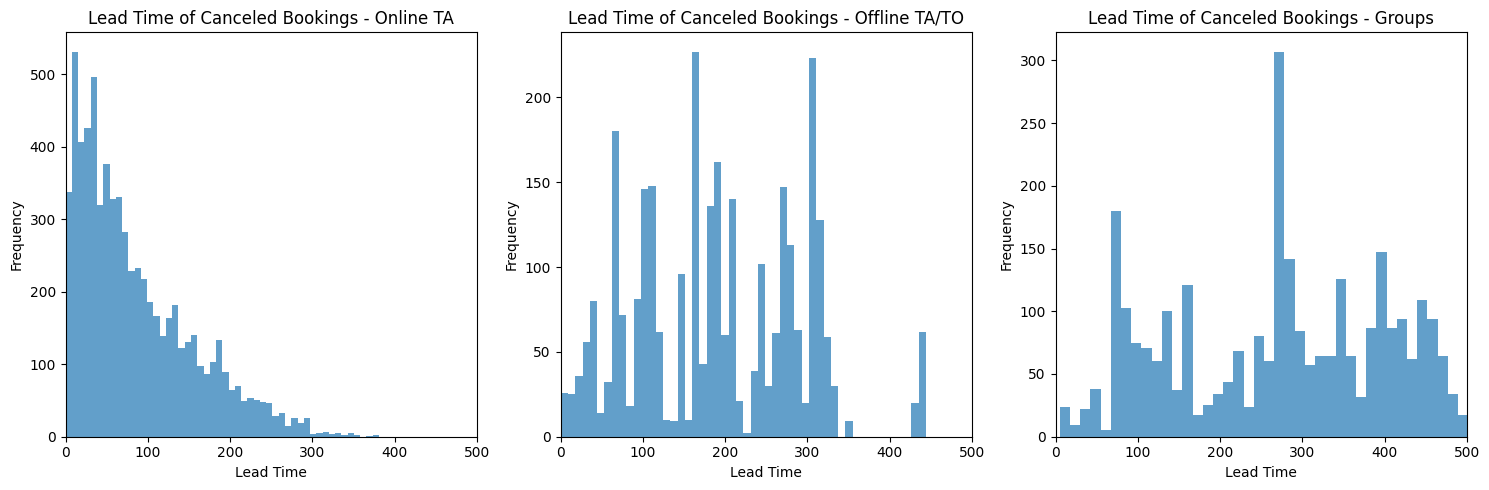

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Filter for TA/TO, specified market segments, and Transient customer type and cancelled bookings
canceled_df = df[
    (df['distribution_channel'] == 'TA/TO') &
    (df['market_segment'].isin(['Online TA', 'Offline TA/TO', 'Groups'])) &
    (df['customer_type'] == 'Transient') &
    (df['is_canceled'] == 1)
].copy()

# Create histograms for each market segment
plt.figure(figsize=(15, 5))

for i, market_segment in enumerate(['Online TA', 'Offline TA/TO', 'Groups']):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
    segment_data = canceled_df[canceled_df['market_segment'] == market_segment]['lead_time']
    plt.hist(segment_data, bins=50, alpha=0.7)  # Increased bins for more detail
    plt.xlabel('Lead Time')
    plt.ylabel('Frequency')
    plt.title(f'Lead Time of Canceled Bookings - {market_segment}')
    plt.xlim(0, 500)

plt.tight_layout()
plt.show()

# **11. ADR Box Plot for TA/TO Selecting market Segmentation (Online TO, Offline TA/TO, Groups) and Customer Type (Transient)**

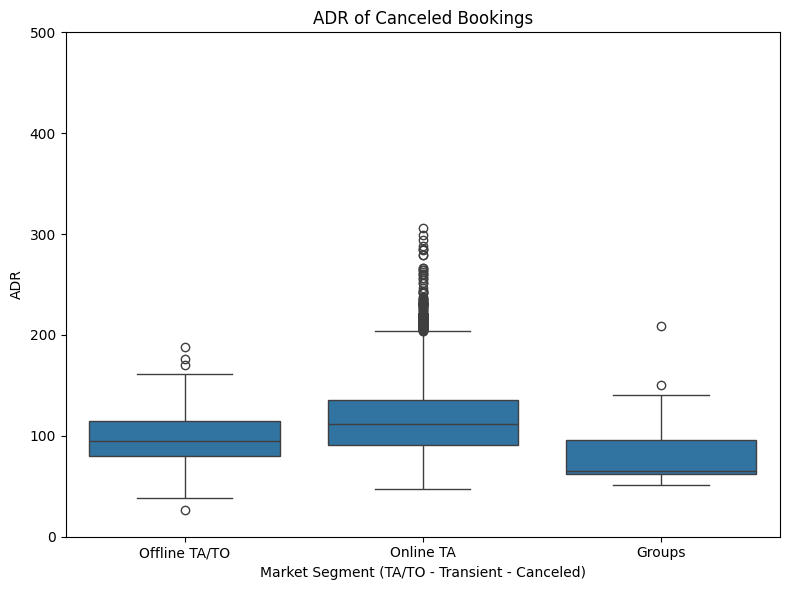

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv("city_hotel_bookings_cleaned - Copy.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()

df['is_canceled'] = pd.to_numeric(df['is_canceled'])

# Filter for TA/TO, specified market segments, and Transient customer type AND canceled bookings
canceled_df = df[
    (df['distribution_channel'] == 'TA/TO') &
    (df['market_segment'].isin(['Online TA', 'Offline TA/TO', 'Groups'])) &
    (df['customer_type'] == 'Transient') &
    (df['is_canceled'] == 1) # Filter for cancelled bookings ONLY
].copy()

# Create the box plot for ADR of canceled bookings
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x='market_segment', y='adr', data=canceled_df)
plt.xlabel('Market Segment (TA/TO - Transient - Canceled)')
plt.ylabel('ADR')
plt.title('ADR of Canceled Bookings')
plt.ylim(0, 500) #Set limit to y axis to make it more readable
plt.tight_layout()
plt.show()